In [141]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pymc as pm
import pytensor as pt
from model import tempered_normal_mixture

In [142]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.23.0


In [143]:
# True parameter values
mu=0
sigma=1
# sample sizes for the different simulations
n_factors = np.array([10, 50, 100, 200, 250, 500, 1000])

In [144]:
pathstr = "./data/observations/n{n}.csv"
x_data = np.loadtxt(Path(pathstr.format(n=1000)), delimiter=',')

In [145]:
model = tempered_normal_mixture(beta=1/np.log(len(x_data)), 
                                data=x_data, 
                                n_components=3,
                                weights_prior_alpha=np.full(3, 0.1),
                                mean_prior_cov=pt.tensor.eye(3)*2
                               )
with model:
    idata = pm.sample(draws=8000, tune=2000, chains=2,
                      cores=10, max_treedepth=50, target_accept=.995)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [weights, mu, like]
python3(41589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Output()

python3(41590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Sampling 2 chains for 2_000 tune and 8_000 draw iterations (4_000 + 16_000 draws total) took 246 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


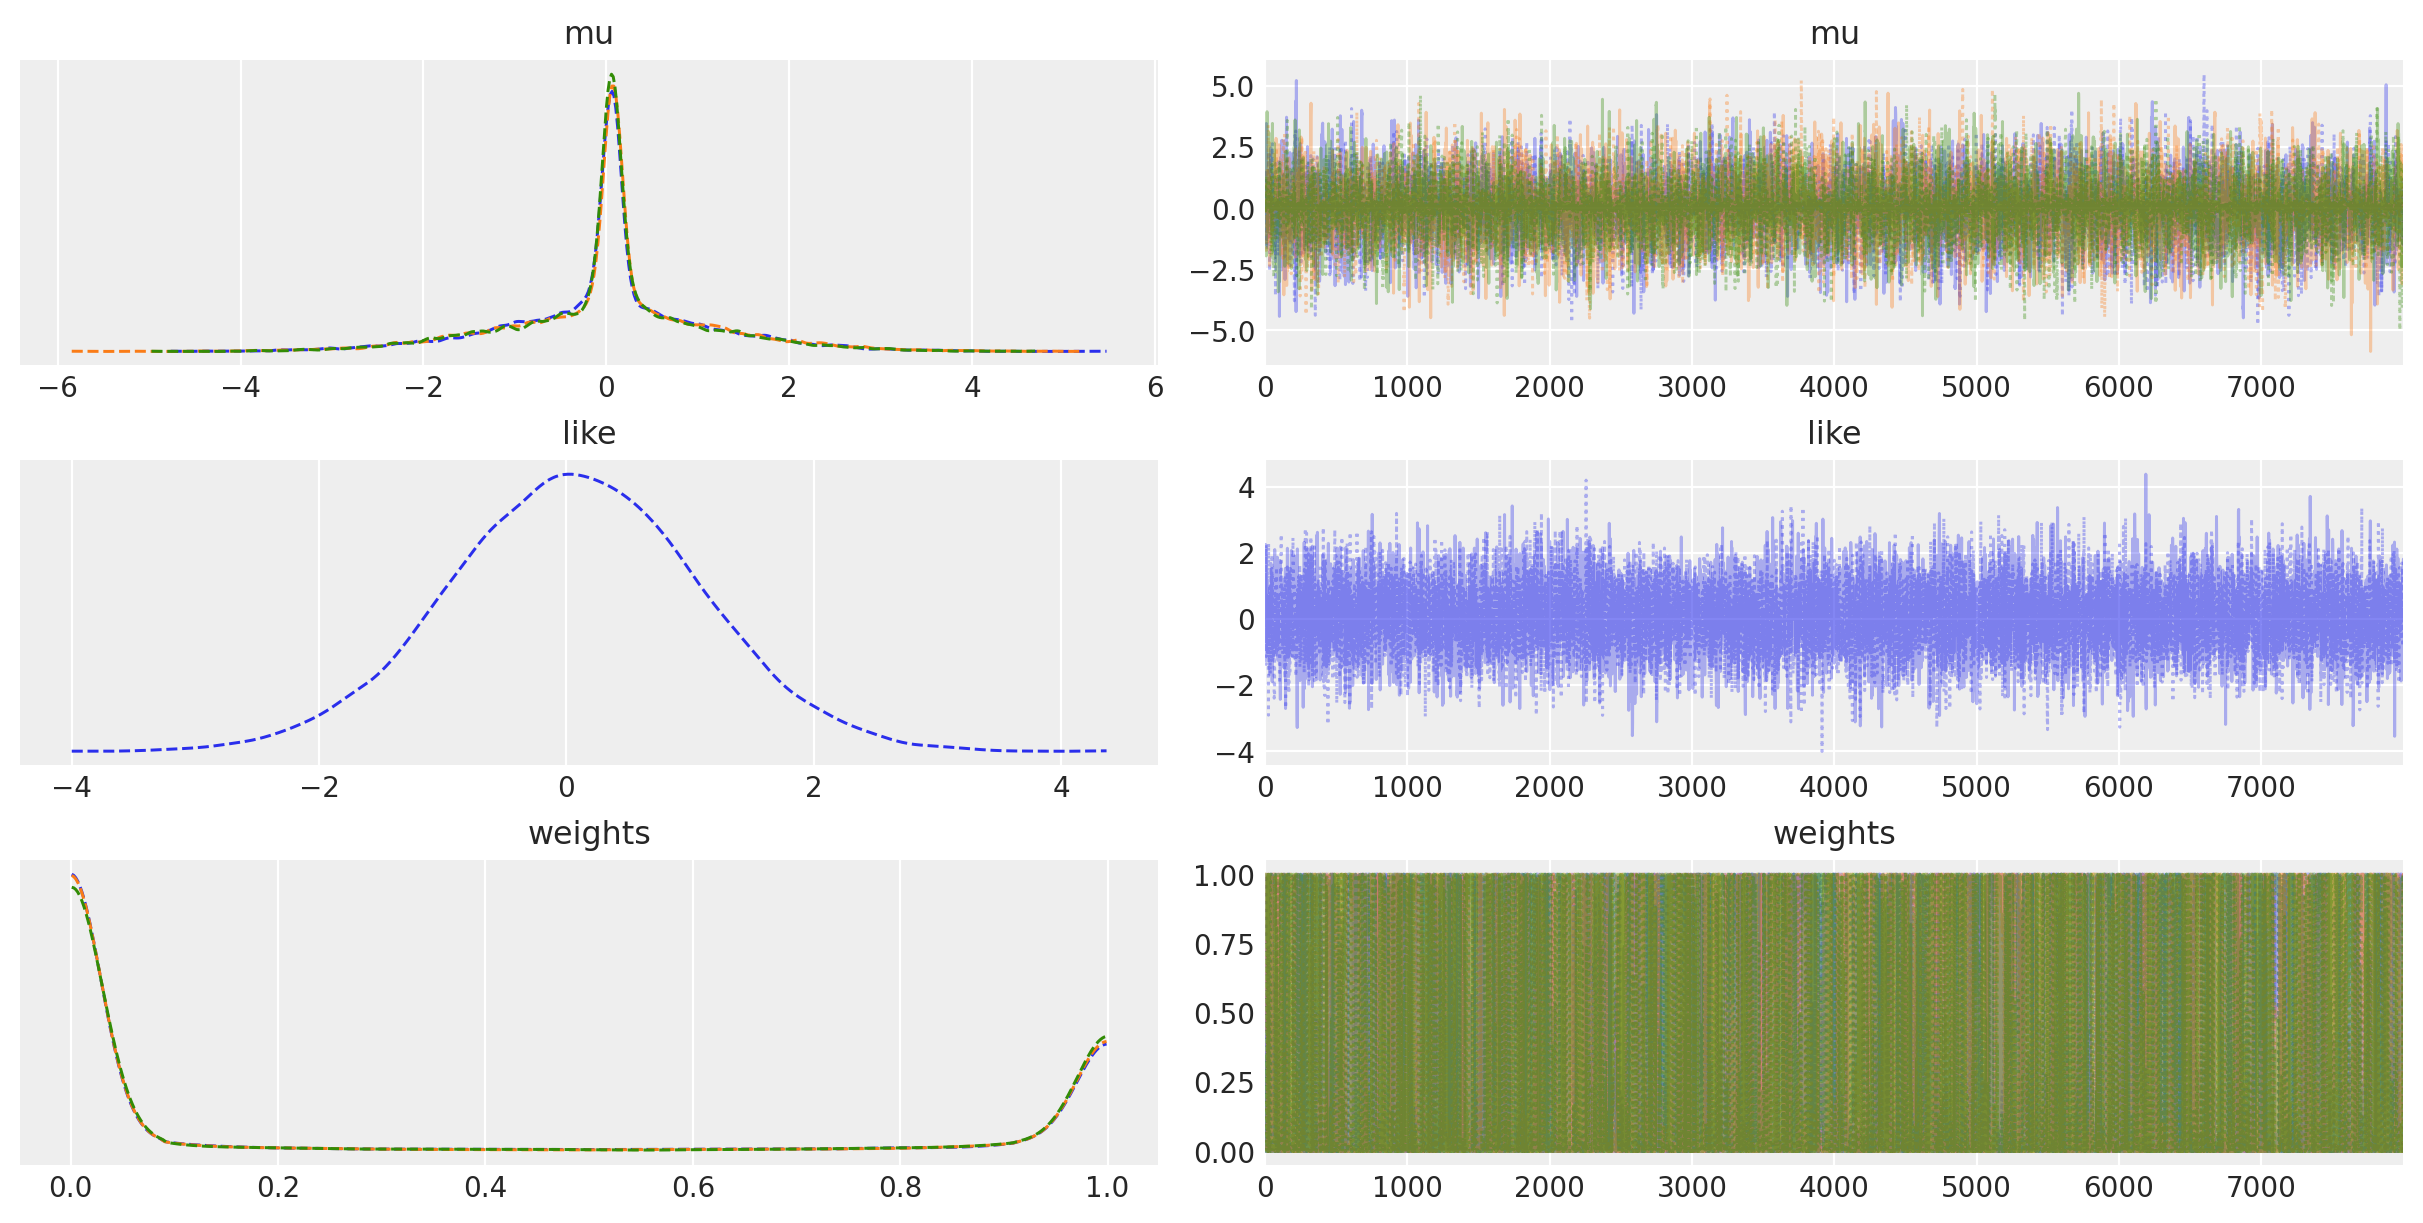

In [146]:
az.plot_trace(idata, combined=True);

array([[<Axes: ylabel='weights\n1'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='weights\n2'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='mu\n0'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='mu\n1'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: xlabel='weights\n0', ylabel='mu\n2'>,
        <Axes: xlabel='weights\n1'>, <Axes: xlabel='weights\n2'>,
        <Axes: xlabel='mu\n0'>, <Axes: xlabel='mu\n1'>]], dtype=object)

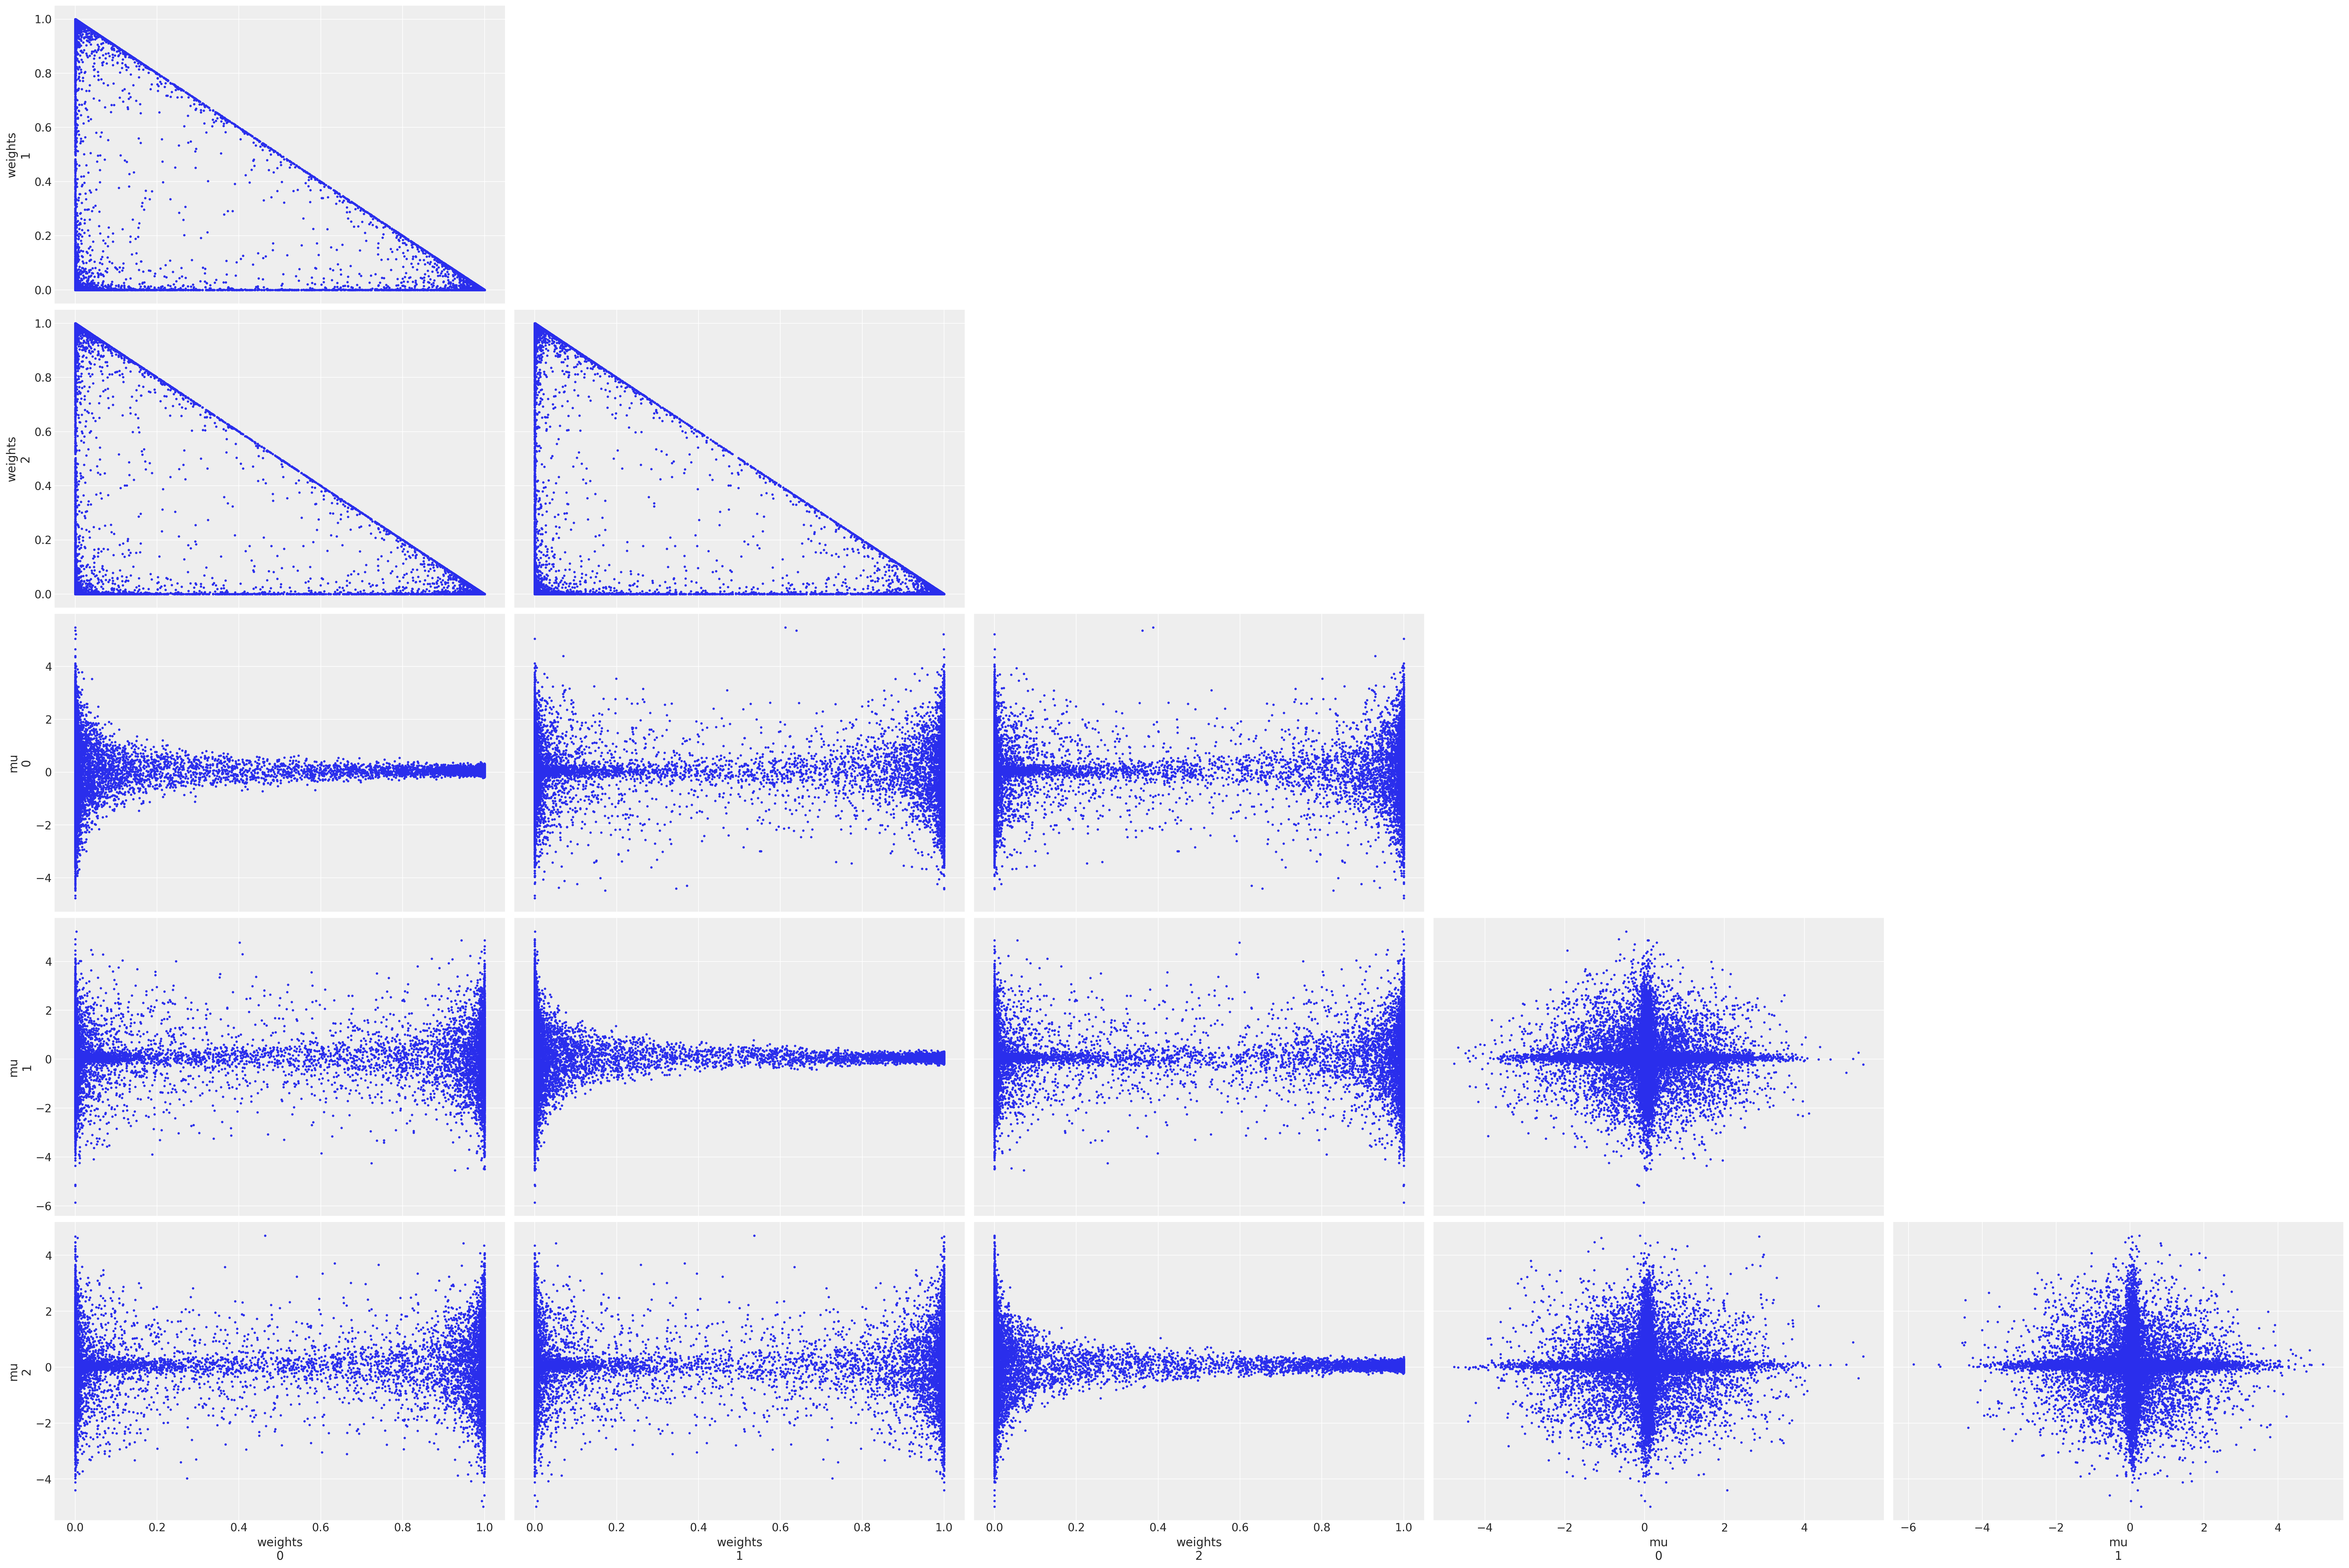

In [147]:
az.plot_pair(idata, var_names=["weights", "mu"], kind="scatter")

array([[<Axes: title={'center': 'weights\n0'}>,
        <Axes: title={'center': 'weights\n1'}>,
        <Axes: title={'center': 'weights\n2'}>],
       [<Axes: title={'center': 'mu\n0'}>,
        <Axes: title={'center': 'mu\n1'}>,
        <Axes: title={'center': 'mu\n2'}>]], dtype=object)

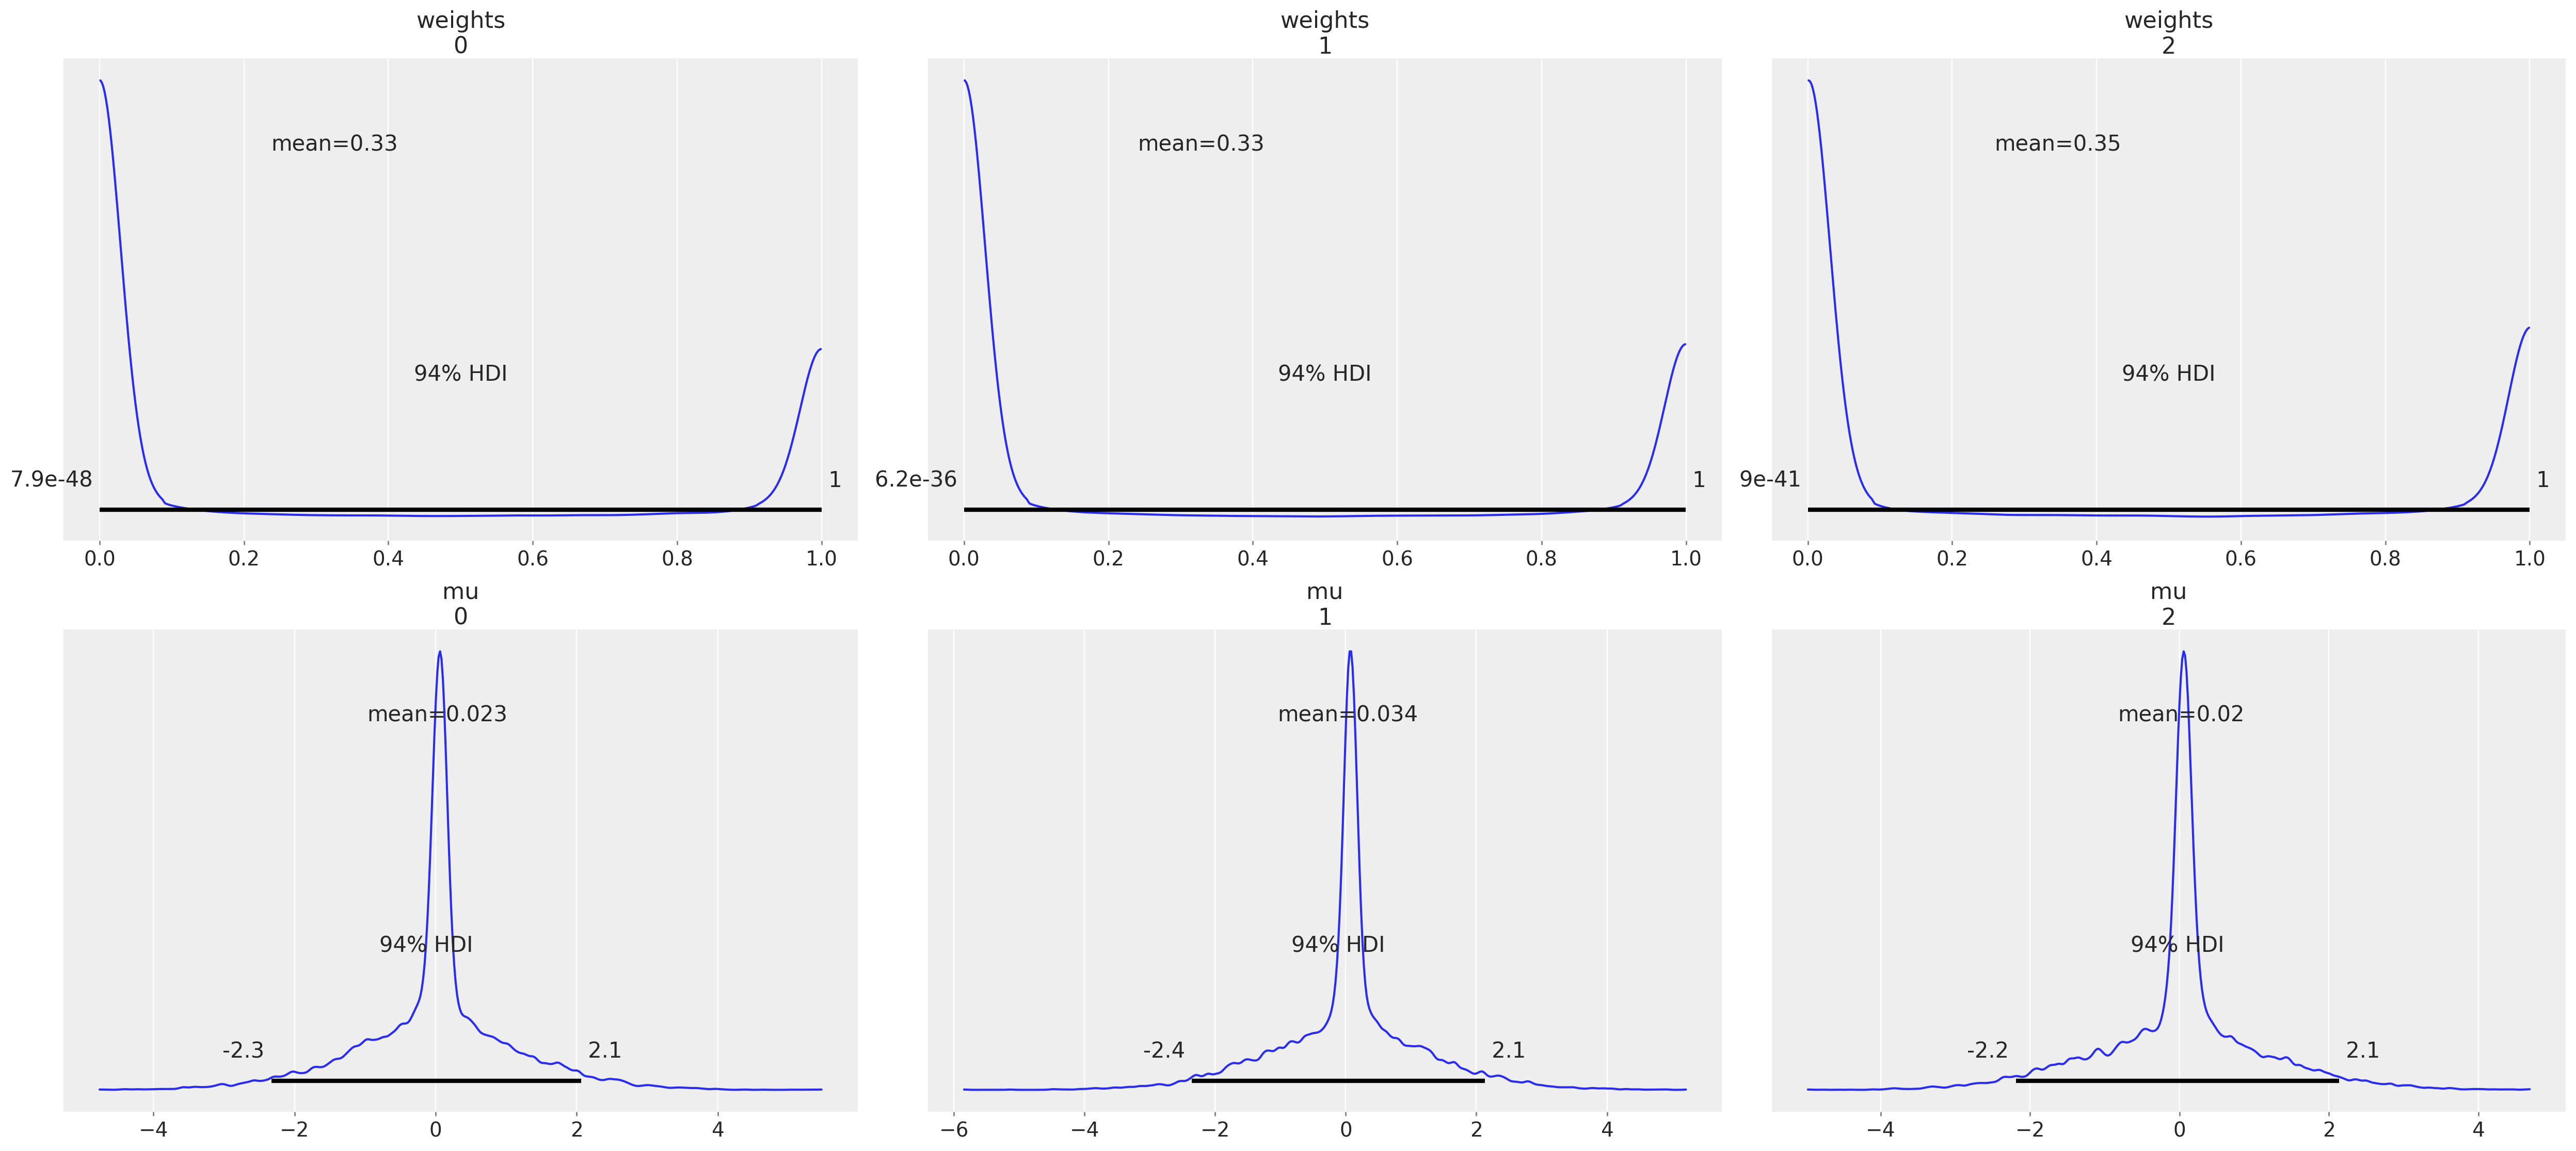

In [148]:
az.plot_posterior(idata, var_names=["weights", "mu"])

In [ ]:
az.summary(idata, var_names=["weights", "mu"], round_to=2)

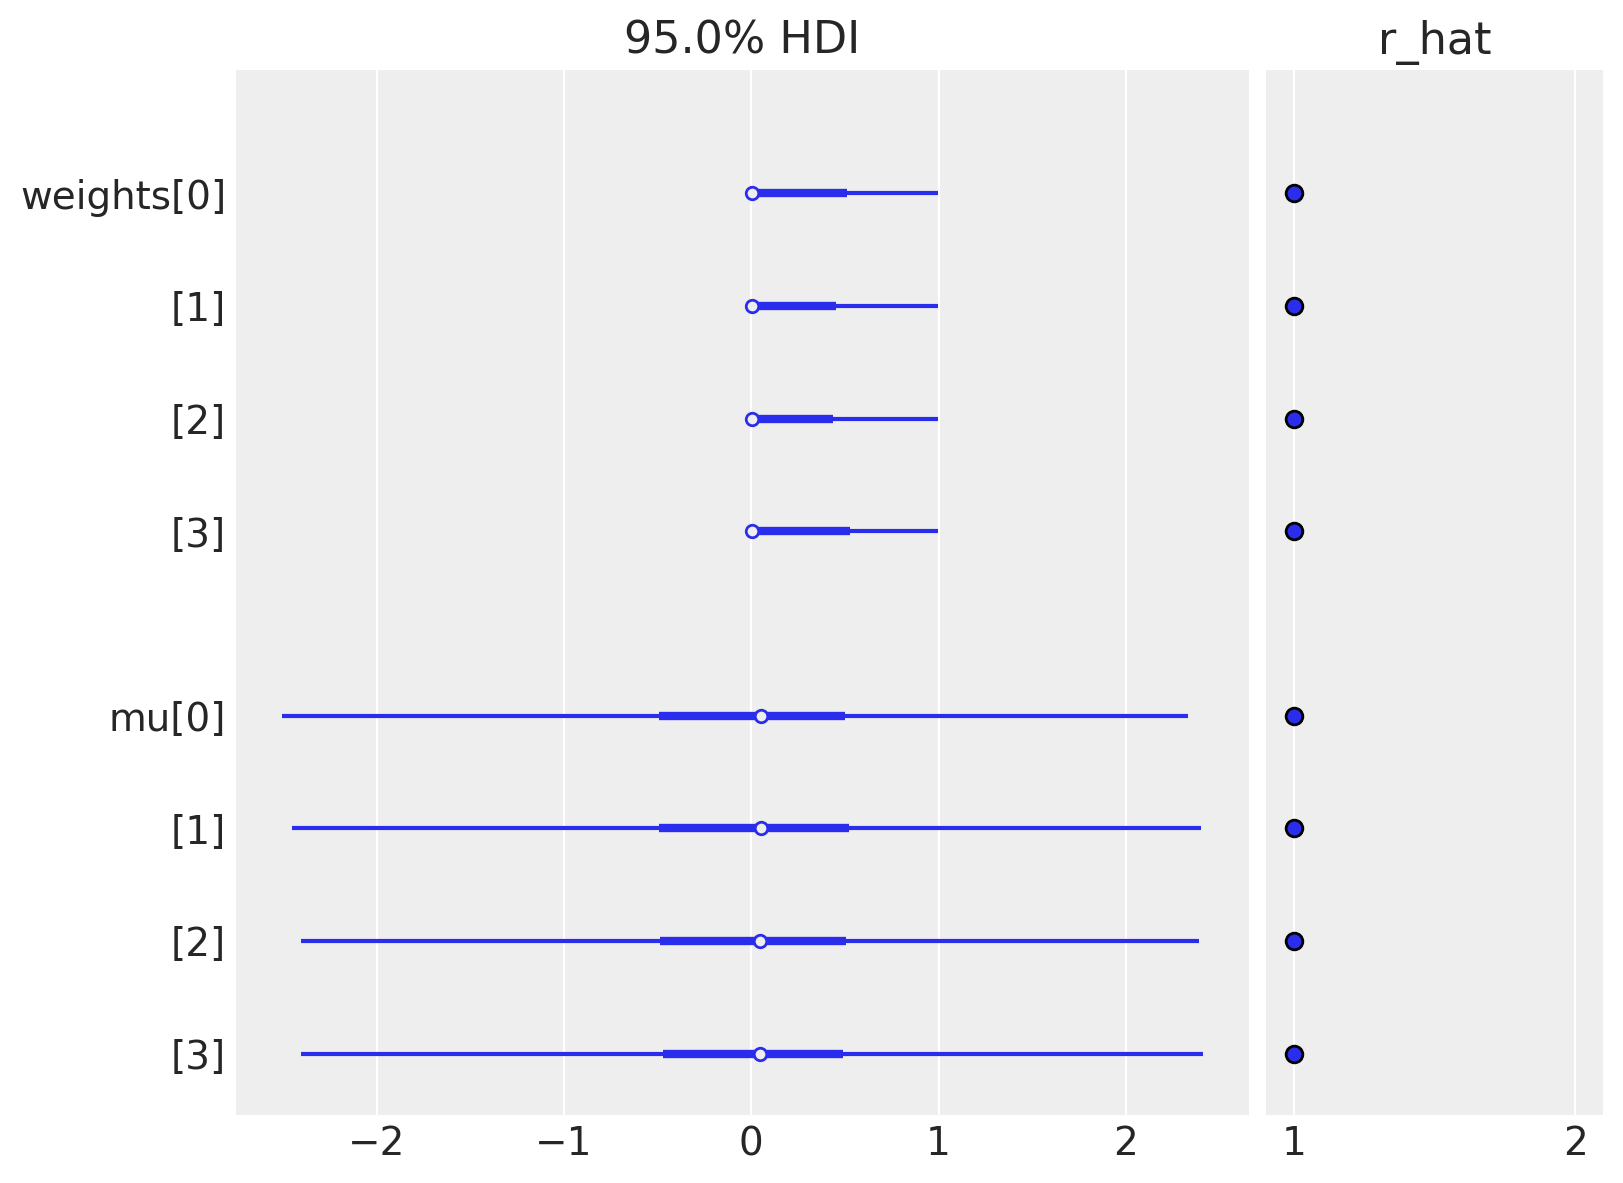

In [45]:
az.plot_forest(idata, var_names=["weights", "mu"], combined=True, hdi_prob=0.95, r_hat=True);

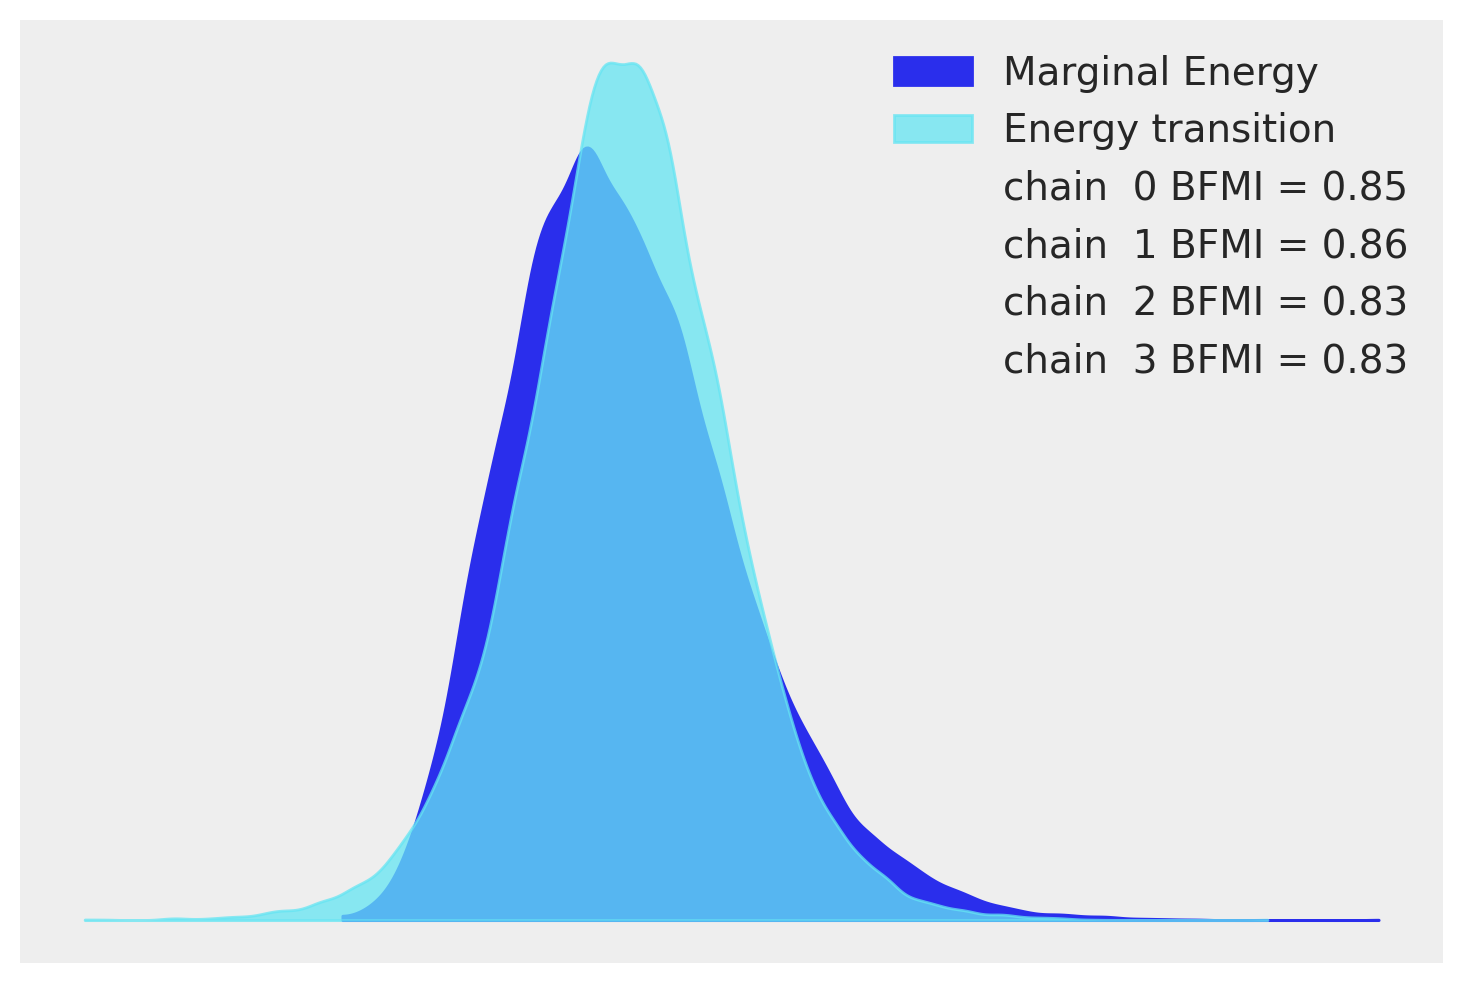

In [46]:
az.plot_energy(idata);

/var/folders/jf/4t6y1sj967l2ctl46wj73srh0000gn/T/ipykernel_21938/4207139880.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


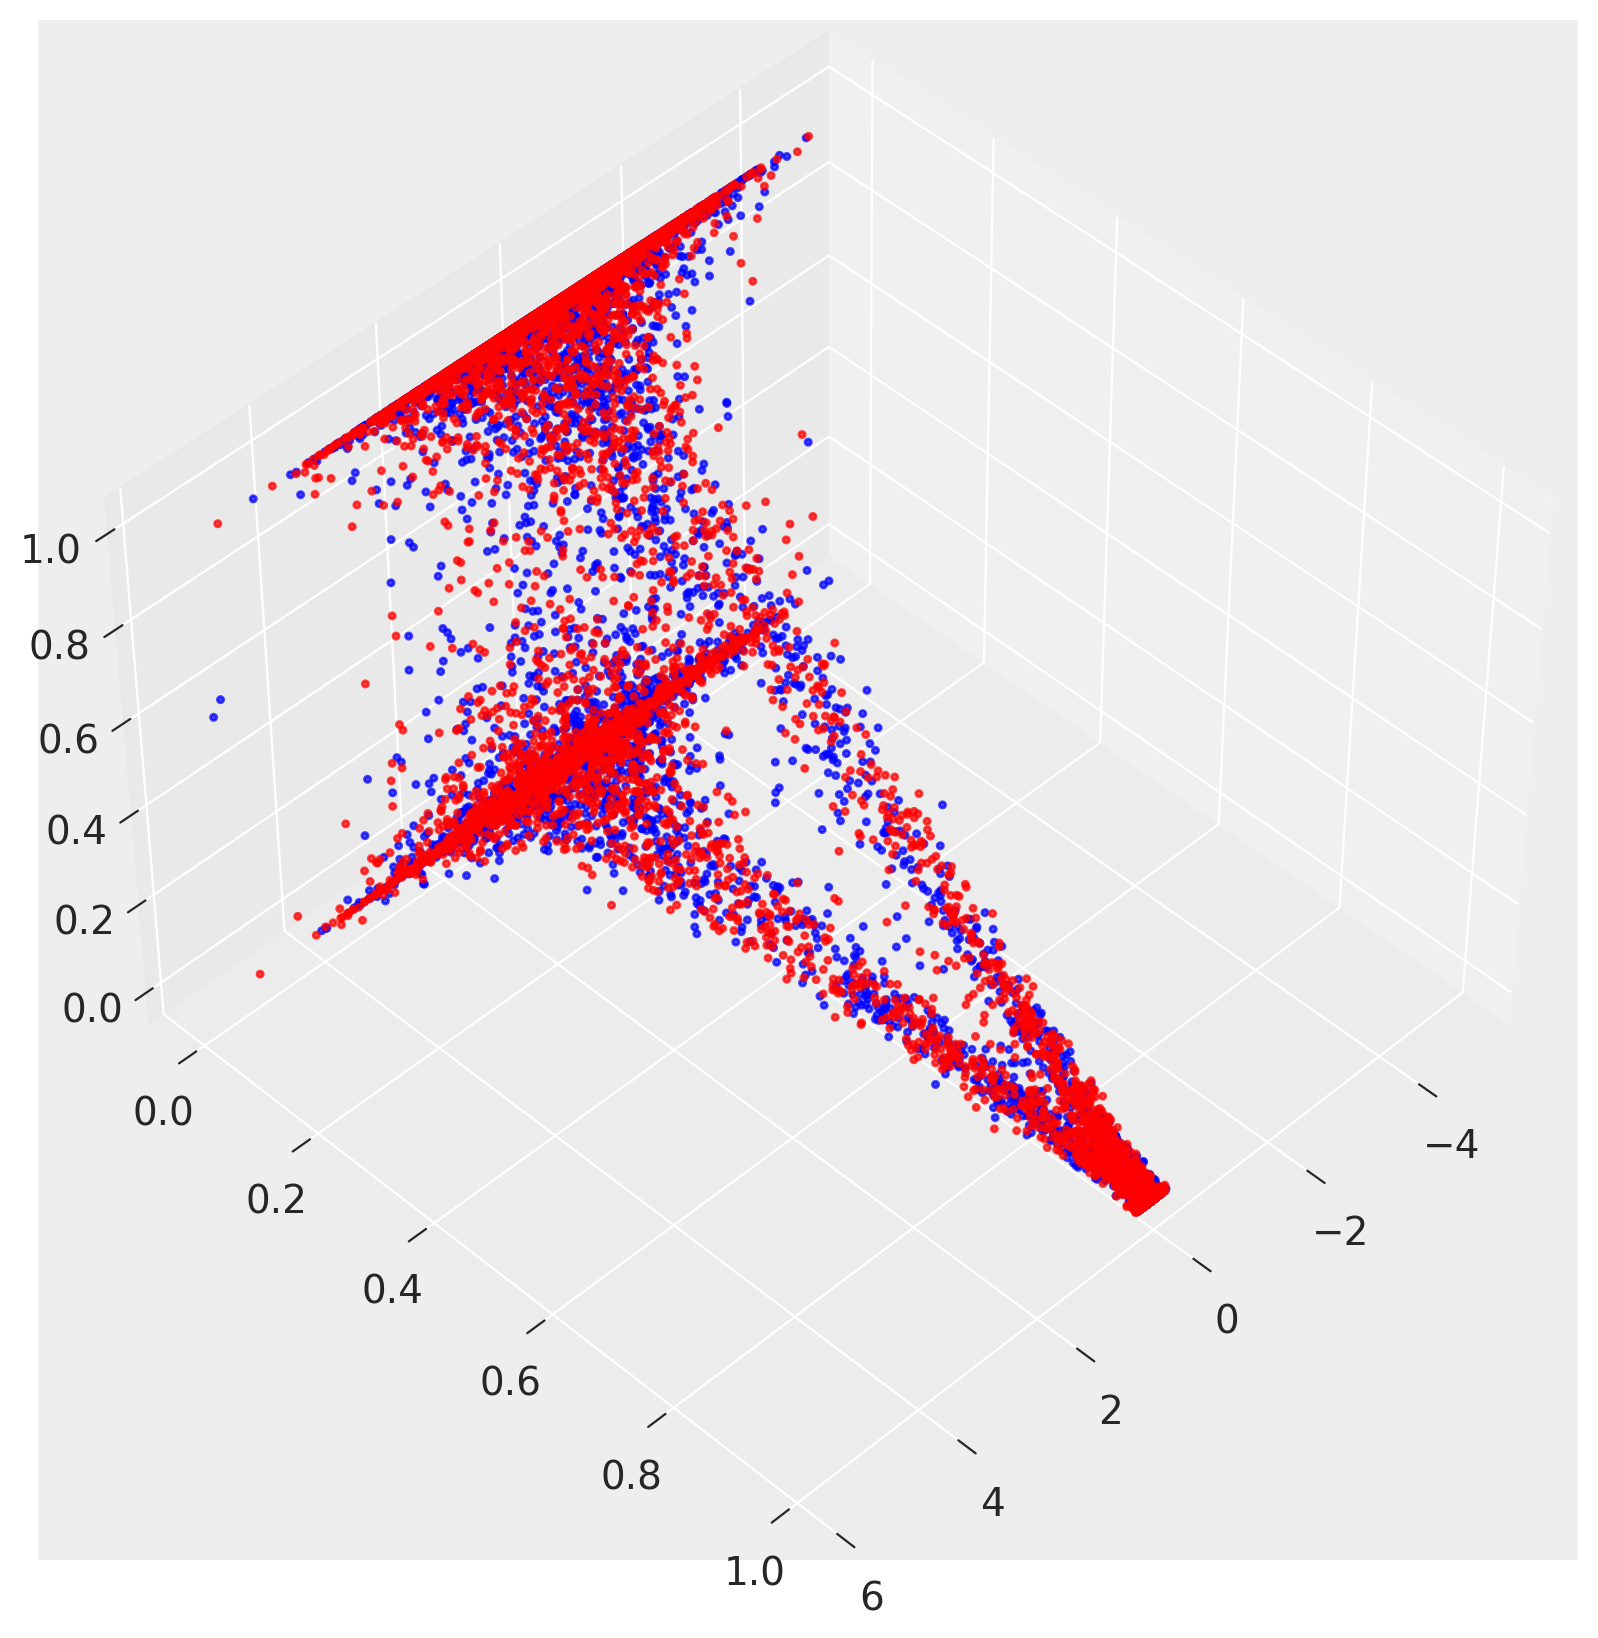

In [160]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'yellow']

# --- 4. Loop through chains and plot ---
for i in range(2):
    # chain_data = idata.posterior["mu"][i, :, :] # Get data for the current chain (100x3)

    x_coords = idata.posterior["mu"][i, :, :][:, 0]
    y_coords = idata.posterior["weights"][i, :, :][:, 0]
    z_coords = idata.posterior["weights"][i, :, :][:, 1]

    ax.scatter(
        x_coords,
        y_coords,
        z_coords,
        c=colors[i % len(colors)], # Use modulo to cycle colors if more chains than colors
        s=5,                     # Size of markers
        alpha=0.7,                # Transparency
        # edgecolor='k',            # Black edges for markers
        label=f'Chain {i}'        # Label for the legend
    )

# Adjust viewing angle (optional)
ax.view_init(elev=45, azim=45)

# Tight layout ensures labels and titles fit
plt.tight_layout()